In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

%matplotlib inline
data_frame=pd.read_csv('C:\\Users\\optimistic\\Desktop\\breast-cancer-wisconsin.csv')
data_frame.head(3)

,Clump_Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2


In [25]:
print(data_frame.isnull().values.any())

False


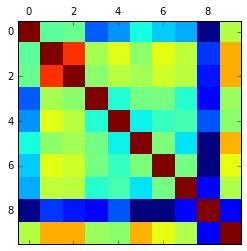

In [26]:
correlation = data_frame.corr()
plt.matshow(correlation)

In [27]:
map_class = {4:1 , 2:0}

# Setting the map to the data_frame
data_frame['Class'] = data_frame['Class'].map(map_class)

# Let's see what we have done
data_frame.head(13)

,Clump_Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [28]:
data_frame.head()

,Clump_Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [29]:
num_true = 0.0
num_false = 0.0
for item in data_frame['Class']:
    if item == 1:
        num_true += 1
    else:
        num_false += 1

percent_true = (num_true / (num_true + num_false)) * 100
percent_false = (num_false / (num_true + num_false)) * 100

print "Number of True Cases: {0} ({1:2.2f}%)".format(num_true, percent_true)
print "Number of False Cases: {0} ({1:2.2f}%)".format(num_false, percent_false)

Number of True Cases: 241.0 (34.48%)
Number of False Cases: 458.0 (65.52%)


In [30]:
from sklearn.cross_validation import train_test_split

feature_column_names = ['Clump_Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses']

predicted_class_name = ['Class']

# Getting feature variable values

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = .330

# Splitting using scikit-learn train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))


66.95% in training set
33.05% in test set


In [32]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing Clump_Thickness: {0}".format(len(data_frame.loc[data_frame['Clump_Thickness'] == 0])))
print("# rows missing Uniformity of Cell Size: {0}".format(len(data_frame.loc[data_frame['Uniformity of Cell Size'] == 0])))
print("# rows missing Uniformity of Cell Shape: {0}".format(len(data_frame.loc[data_frame['Uniformity of Cell Shape'] == 0])))
print("# rows missing Marginal Adhesion: {0}".format(len(data_frame.loc[data_frame['Marginal Adhesion'] == 0])))
print("# rows missing Single Epithelial Cell Size: {0}".format(len(data_frame.loc[data_frame['Single Epithelial Cell Size'] == 0])))
print("# rows missing Bare Nuclei: {0}".format(len(data_frame.loc[data_frame['Bare Nuclei'] == 0])))
print("# rows missing Bland Chromatin: {0}".format(len(data_frame.loc[data_frame['Bland Chromatin'] == 0])))
print("# rows missing Normal Nucleoli: {0}".format(len(data_frame.loc[data_frame['Normal Nucleoli'] == 0])))
print("# rows missing Mitoses: {0}".format(len(data_frame.loc[data_frame['Mitoses'] == 0])))




from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# rows in dataframe 699
# rows missing Clump_Thickness: 0
# rows missing Uniformity of Cell Size: 0
# rows missing Uniformity of Cell Shape: 0
# rows missing Marginal Adhesion: 0
# rows missing Single Epithelial Cell Size: 0
# rows missing Bare Nuclei: 16
# rows missing Bland Chromatin: 0
# rows missing Normal Nucleoli: 0
# rows missing Mitoses: 0


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())
prediction_from_trained_data = nb_model.predict(X_train)

# get current accuracy of the model

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print "Accuracy of our naive bayes model is : {0:.4f}".format(accuracy)

Accuracy of our naive bayes model is : 0.9551


In [38]:
prediction_from_test_data = nb_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print "Accuracy of our naive bayes model is : {0:.4f}".format(accuracy)

Accuracy of our naive bayes model is : 0.9654


In [40]:
print "Confusion Matrix"

# labels for set 1=True to upper left and 0 = False to lower right
print "{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0]))

print "Classification Report"

# labels for set 1=True to upper left and 0 = False to lower right
print "{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0]))

Confusion Matrix
[[ 75   2]
 [  6 148]]
Classification Report
             precision    recall  f1-score   support

          1       0.93      0.97      0.95        77
          0       0.99      0.96      0.97       154

avg / total       0.97      0.97      0.97       231



In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print "Accuracy: {0:.4f}".format(rf_accuracy)

Accuracy: 0.9979


In [43]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print "Accuracy: {0:.4f}".format(rf_accuracy_testdata)

Accuracy: 0.9610


In [44]:
print "Confusion Matrix for Random Forest"

# labels for set 1=True to upper left and 0 = False to lower right
print "{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]))

print ""

print "Classification Report\n"

# labels for set 1=True to upper left and 0 = False to lower right
print "{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0]))

Confusion Matrix for Random Forest
[[ 72   5]
 [  4 150]]

Classification Report

             precision    recall  f1-score   support

          1       0.95      0.94      0.94        77
          0       0.97      0.97      0.97       154

avg / total       0.96      0.96      0.96       231

